In the last notebook, we used a regression technique, specifically linear regression, to estimate a numerical value as prediction. We did some matrix math, gradient descent and most helpfully, sklearn to just do the hard work for us. This time, we'll do supervised learning on <b>categorical variables</b> also known as <b>classification problems</b>.

We'll make things easier this time. We will use a much smaller dataset and sklearn to do the heavy lifting for us. First though, we'll do some math.

# Iris dataset, a visualization

Recall that the iris dataset has three classes, setosa, virginica and versicolor. Setosa is the easiest to classify across all dimensions. Virginica and versicolor though, are more difficult. For our reference, here's the visualizations.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
data = pd.read_csv('data/iris.csv')

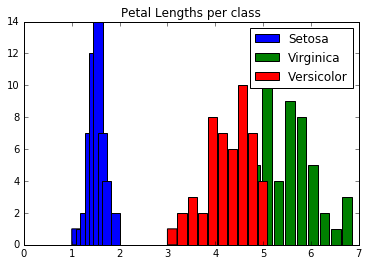

In [2]:
ax = plt.subplot(111)

p_length_setosa = data[data.Name=="Iris-setosa"]["PetalLength"]
p_length_virginica = data[data.Name=="Iris-virginica"]["PetalLength"]
p_length_versicolor = data[data.Name=="Iris-versicolor"]["PetalLength"]

ax.hist(p_length_setosa, width=0.2,color='b', label="Setosa")
ax.hist(p_length_virginica, width=0.2,color='g', label="Virginica")
ax.hist(p_length_versicolor ,width=0.2,color='r', label="Versicolor")

plt.title("Petal Lengths per class")
plt.legend()
plt.show()

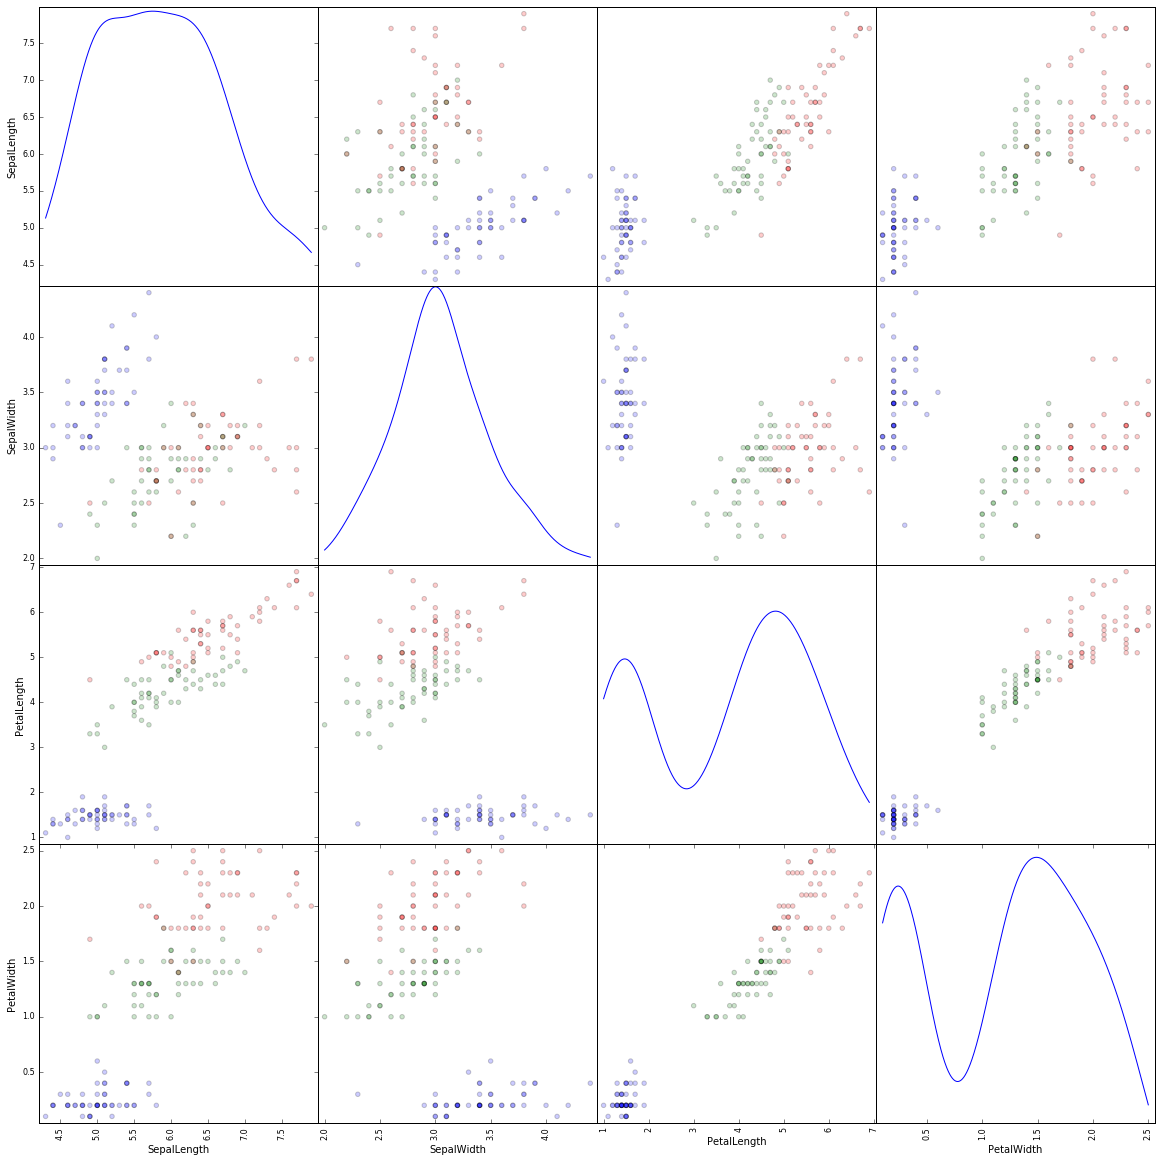

In [3]:
from pandas.tools.plotting import scatter_matrix
color_wheel = {"Iris-setosa": "blue", "Iris-virginica":"red", "Iris-versicolor":"green"}
scatter_matrix(data, c=data["Name"].apply(lambda x:color_wheel[x]), alpha=0.2, figsize=(20, 20), 
               diagonal='kde', marker='o')
plt.show()

## Logistic Regression

Take the simplest form of classification, a binary 0 or 1 problem. Obviously we need our predictions to either only output either of the two. Thus, we need a <b>hypothesis</b> that can "convert" any numerical value to categorical values. A function that solves this case is the <b>sigmoid function</b>.

$$g(z) = \frac{1}{1+e^{-z}}$$

We then take this function and put it into our original linear hypothesis, similar to linear regression:

$$h_\theta(x) = g(\theta^T X)$$

Which when expanded is:

$$h_\theta(x) = \frac{1}{1+e^{-( \sum_{i=0}^{m} \theta_i X^{(i)}  )}}   $$

$$h_\theta(x) = \frac{1}{1+e^{-(\theta_0 X^{(0)} + \theta_1 X^{(1)} + ... + \theta_m X^{(m)})}}   $$

This is the <b>logistic regression</b> algorithm, which seeks to find the hyperplane that separates the dataset.

Here is how the sigmoid function looks like:

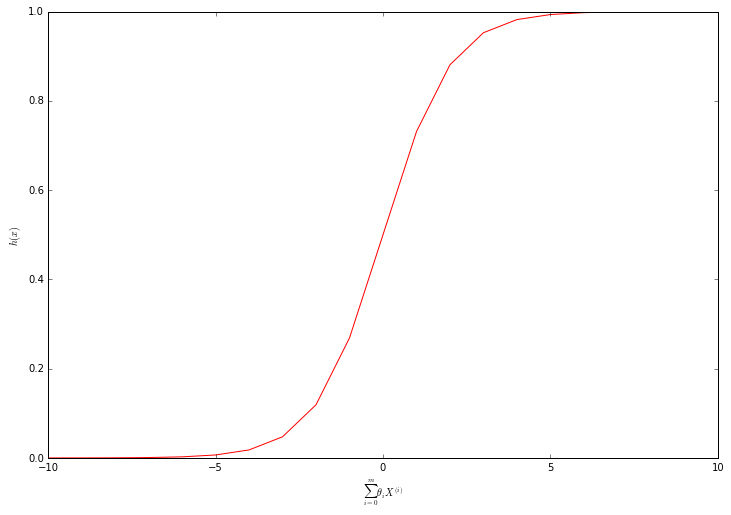

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')
plt.ylabel(r'$h(x)$')
plt.xlabel(r'$\sum_{i=0}^{m} \theta_i X^{(i)}$')

Some observations:

1) If we define the threshold to be at 0.5, then we just divide the sigmoid right at the middle.
\begin{align}
h_\theta(x)=
\begin{cases}
    1,& \text{if } h_\theta(x) \geq 0.5\\
    0,              & \text{otherwise}
\end{cases}
\end{align}

2) At the "middle" the x-axis transitions to the negative. Recall that the following is a line:
$$z = \sum_{i=0}^{m} \theta_i X^{(i)} $$ 

Therefore, 

$$ g(x) \geq 0.5 \text{ when } z \geq 0 $$
$$ g(x) \lt 0.5 \text{ when } z \lt 0 $$

In [5]:
from IPython.display import display, Image
display(Image(url='https://i.ytimg.com/vi/7F-CuXdTQ5k/maxresdefault.jpg'))
# credits to Andrew Ng's class in Coursera. I can't find any better slides in the net to illustrate these things.

And finally, for multi-class problems, one procedure is to divide the dataset one class at a time. Then we take the <b>maximum value for the hypothesis across all models</b> as representative of the final output.

In [6]:
from IPython.display import display, Image
display(Image(url='http://img.blog.csdn.net/20130511234340371'))
# credits to Andrew Ng's class in Coursera. I can't find any better slides in the net to illustrate these things.

##  Logistic Regression Loss Function

Now that we've defined the hypothesis function for logistic regression, we'll go with its cost function. The loss function being optimized is the following. It is called the <b> cross entropy </b>.

$$ J(\theta,y) = \frac{1}{m}\sum_{i=0}^{m}cost(h_\theta(x^{(i)}),y) $$

Then the cost function is as follows:

\begin{align}
cost(h_\theta(x^{(i)}), y)=
\begin{cases}
    -log(h_\theta(x^{(i)})),    & \text{if } y=1\\
    -log(1-h_\theta(x^{(i)})),  & \text{if } y=0\\
\end{cases}
\end{align}

Or succinctly:
$$
J(\theta,y) = \frac{1}{m}\sum_{i=0}^{m}y^{(i)}log(h_\theta(x^{(i)})) + (1-y^{(i)})log(1- h_\theta(x^{(i)}))
$$

It looks like the following graph, for the case when y=0 and y=1. Notice that again, there is a <b> single global minimum </b>which means it's easily optimized using gradient descent (or any advanced second order optimization algorithms)

In [7]:
from IPython.display import display, Image
display(Image(url='https://gigadom.files.wordpress.com/2013/11/7.jpg'))

#  Straight to Sklearn this time

Thankfully, these are all rote in scikit-learn. We'll analyze the outputs for the Iris dataset.

Good thing we don't have to do much feature engineering here since all the values (save for the target) are already numerical with no missing values and only a few samples to use.

In [12]:
from sklearn import linear_model, utils, metrics, cross_validation

target = "Name"
X = data.drop(target, axis=1)
y = data[target]
X,y = utils.shuffle(X, y)
# I'll make the y values numerical so we can plot it easily
y = pd.Categorical(y).codes

X_train = X[:120].as_matrix()
y_train = y[:120]
X_test = X[120:].as_matrix()
y_test = y[120:]

logres = linear_model.LogisticRegression()
print("Accuracy: {}".format(cross_validation.cross_val_score(logres, X_train, y_train,cv=5)))
print("Cross Entropy: {}".format(cross_validation.cross_val_score(logres, X_train, y_train,cv=5,scoring='log_loss')))

Accuracy: [ 1.          1.          0.91666667  0.91666667  0.95833333]
Cross Entropy: [-0.30689237 -0.3157937  -0.39742349 -0.36158135 -0.32683684]


Well that's pretty much okay right? Let's visualize the decision boundary, at least for 2D.

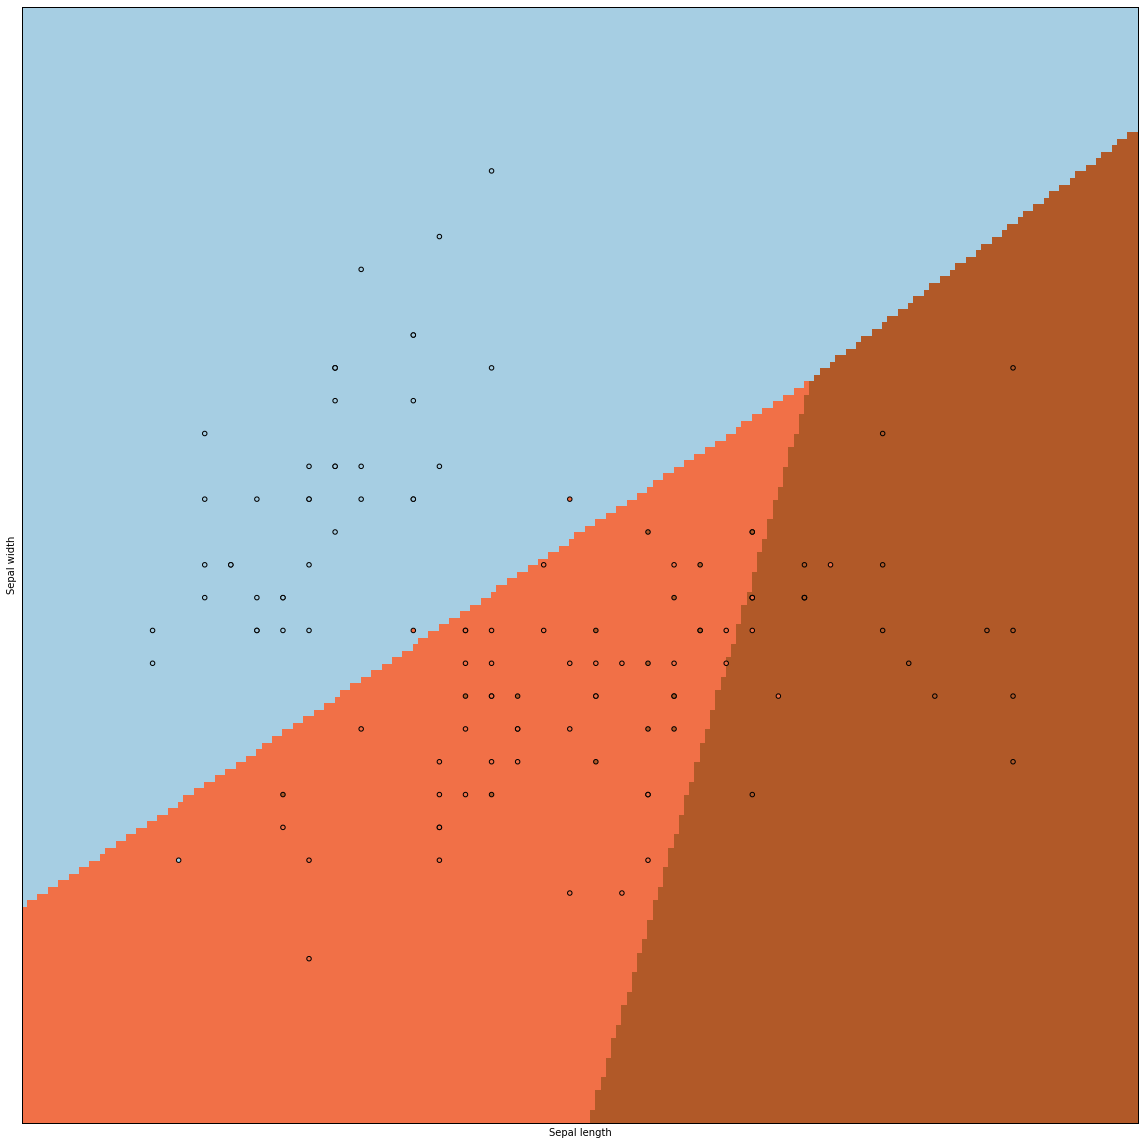

In [13]:
logres = linear_model.LogisticRegression()
logres.fit(X_train[:,:2], y_train)

h = .02  # step size in the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logres.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(20, 20))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Q: Hack your way to visualizing the other attributes.
1. Sepal Width to Petal Width
2. Sepal Length to Petal Length
3. Petal Length to Petal Width

#  Homework

The only homework this week is seeing your name in the Kaggle Leaderboards.

1) Join this competition. https://www.kaggle.com/c/titanic

2) Download the "train" and "test" set here: https://www.kaggle.com/c/titanic/data

3) Feature engineer your way to using any combination of the variables in the data.

4) Using your feature engineering steps, transform the test data and perform prediction. Submit to https://www.kaggle.com/c/titanic/submit-as

5) Submission format is (headers included): 
    
    PassengerId, Survived
    123, 0
    987, 1

In [21]:
print "Train {}".format( X_train.shape)
print "Test {}".format( X_test.shape)

Train (120, 4)
Test (30, 4)


In [24]:
logres.fit(X_train, y_train)
for v in logres.predict(X_test):
    print v

2
2
0
2
1
2
2
0
0
0
1
0
1
2
0
1
2
0
2
0
2
2
0
2
2
1
0
1
2
2
